<a href="https://colab.research.google.com/github/nithinkumar66/Blood-Bank-Management/blob/master/Copy_of_ml_age%2Cemotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install deepface
!pip install dlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 14.0 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=b369decf04a5c6ecd568969570b583b3bb4c8cb14c1084fd0382b638007507ae
  Stored in directory: /root/.cache/pip/wheels/19/39/2f/2d3cadc408a8804103f1c34ddd4b9f6a93497b11fa96fe738e
Successfully built fire


In [ ]:
# Some imports and our image viewing function
import dlib
import tarfile
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function
def imshow(title = "Image", image = None, size = 6):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

In [ ]:
# Download facial landmarks
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/shape_predictor_68_face_landmarks.dat

--2024-11-19 22:36:22--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/shape_predictor_68_face_landmarks.dat
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 52.95.148.106, 3.5.246.114, 52.95.149.142, ...
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|52.95.148.106|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2024-11-19 22:36:22 ERROR 404: Not Found.



In [ ]:
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2


--2024-11-19 22:40:06--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  37.6MB/s    in 1.6s    

2024-11-19 22:40:08 (37.6 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]



In [ ]:
!bunzip2 shape_predictor_68_face_landmarks.dat.bz2


In [ ]:
# Download our test images and a test pic
!gdown --id 1RDw1BqsuZv4auJNv3iJ4ToIOnBq9WsVZ
!unzip -q face_recognition.zip
!wget https://github.com/rajeevratan84/ModernComputerVision/raw/main/me.jpg

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1RDw1BqsuZv4auJNv3iJ4ToIOnBq9WsVZ
To: /content/face_recognition.zip
100% 4.84M/4.84M [00:00<00:00, 220MB/s]
--2024-11-19 22:41:35--  https://github.com/rajeevratan84/ModernComputerVision/raw/main/me.jpg
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/me.jpg [following]
--2024-11-19 22:41:35--  https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/me.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githu

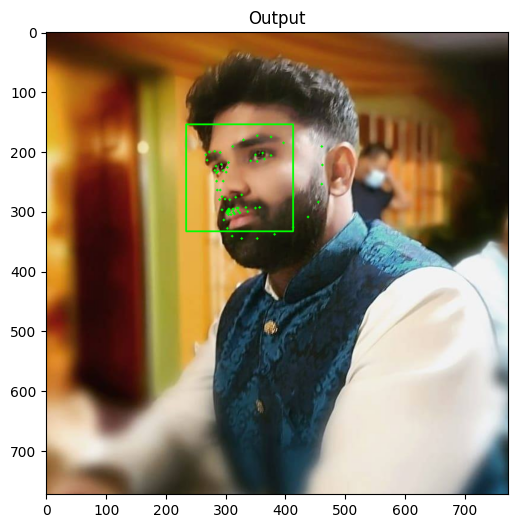

In [ ]:
from imutils import face_utils

p = "shape_predictor_68_face_landmarks.dat"
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(p)

image = cv2.imread('me.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Get faces
rects = detector(gray, 0)

# For each detected face, find the landmark.
for (i, rect) in enumerate(rects):
    # Make the prediction and transfom it to numpy array
    shape = predictor(gray, rect)
    shape = face_utils.shape_to_np(shape)
    (x, y, w, h) = face_utils.rect_to_bb(rect)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    # Draw on our image, all the finded cordinate points (x,y)
    for (x, y) in shape:
        cv2.circle(image, (x, y), 2, (0, 255, 0), -1)

# Show the image
imshow("Output", image)

In [ ]:
!gdown --id 1Id32-d-nS9BooBLLkw1PQhvLWWAukCsq
!gdown --id 1txWignSWdELl8cWdZHYqIlSE2ZRjI8WI
!gdown --id 1d_tQRWjvQ5i4lZyUfFEfRj7LzXWXseBY
!gdown --id 1kWp2CVg_xTIFqdZAwfN_86A3grim9NyI

!mv facial_expression_model_weights.zip /root/.deepface/weights/facial_expression_model_weights.zip
!mv age_model_weights.h5 /root/.deepface/weights/age_model_weights.h5
!mv gender_model_weights.h5 /root/.deepface/weights/gender_model_weights.h5
!mv race_model_single_batch.zip /root/.deepface/weights/race_model_single_batch.zip

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Id32-d-nS9BooBLLkw1PQhvLWWAukCsq
To: /content/facial_expression_model_weights.zip
100% 5.54M/5.54M [00:00<00:00, 36.9MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1txWignSWdELl8cWdZHYqIlSE2ZRjI8WI
From (redirected): https://drive.google.com/uc?id=1txWignSWdELl8cWdZHYqIlSE2ZRjI8WI&confirm=t&uuid=438df6f3-45f3-4f82-b228-d69e2135e8b2
To: /content/age_model_weights.h5
100% 539M/539M [00:09<00:00, 59.7MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning

In [ ]:
from deepface import DeepFace

obj = DeepFace.analyze(img_path =  "./training_faces/Nidia_1.jpg", actions = ['age', 'gender', 'race', 'emotion'])
print(obj["age"]," years old ",obj["dominant_race"]," ",obj["dominant_emotion"]," ", obj["gender"])

24-11-19 22:43:54 - Directory /root/.deepface has been created
24-11-19 22:43:54 - Directory /root/.deepface/weights has been created


Action: age:   0%|          | 0/4 [00:00<?, ?it/s]    

24-11-19 22:43:57 - age_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/age_model_weights.h5
To: /root/.deepface/weights/age_model_weights.h5

  0%|          | 0.00/539M [00:00<?, ?B/s]
  2%|▏         | 8.39M/539M [00:00<00:06, 83.0MB/s]
  6%|▌         | 32.0M/539M [00:00<00:02, 170MB/s] 
 11%|█▏        | 60.8M/539M [00:00<00:02, 223MB/s]
 17%|█▋        | 89.1M/539M [00:00<00:01, 245MB/s]
 22%|██▏       | 116M/539M [00:00<00:01, 240MB/s] 
 26%|██▌       | 140M/539M [00:00<00:01, 232MB/s]
 30%|███       | 164M/539M [00:00<00:01, 227MB/s]
 35%|███▌      | 189M/539M [00:00<00:01, 235MB/s]
 40%|███▉      | 213M/539M [00:00<00:01, 231MB/s]
 44%|████▍     | 236M/539M [00:01<00:01, 231MB/s]
 48%|████▊     | 260M/539M [00:01<00:01, 214MB/s]
 53%|█████▎    | 284M/539M [00:01<00:01, 215MB/s]
 57%|█████▋    | 306M/539M [00:01<00:01, 173MB/s]
 62%|██████▏   | 331M/539M [00:01<00:01, 193MB/s]
 67%|██████▋   | 359M/539M [00:01<00:00, 214MB/s]
 72%|███████▏  | 387M/539M [00:01<00:00, 

24-11-19 22:44:06 - gender_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/gender_model_weights.h5
To: /root/.deepface/weights/gender_model_weights.h5

  0%|          | 0.00/537M [00:00<?, ?B/s]
  2%|▏         | 9.96M/537M [00:00<00:05, 99.0MB/s]
  6%|▌         | 32.0M/537M [00:00<00:03, 168MB/s] 
 10%|▉         | 53.0M/537M [00:00<00:02, 170MB/s]
 14%|█▍        | 74.4M/537M [00:00<00:02, 186MB/s]
 17%|█▋        | 93.3M/537M [00:00<00:03, 116MB/s]
 20%|██        | 109M/537M [00:00<00:03, 118MB/s] 
 23%|██▎       | 123M/537M [00:01<00:04, 94.2MB/s]
 28%|██▊       | 148M/537M [00:01<00:03, 126MB/s] 
 31%|███       | 164M/537M [00:01<00:04, 92.2MB/s]
 33%|███▎      | 178M/537M [00:01<00:03, 100MB/s] 
 37%|███▋      | 200M/537M [00:01<00:02, 121MB/s]
 42%|████▏     | 226M/537M [00:01<00:02, 153MB/s]
 46%|████▋     | 249M/537M [00:01<00:01, 171MB/s]
 50%|█████     | 270M/537M [00:01<00:01, 180MB/s]
 54%|█████▍    | 292M/537M [00:02<00:01, 191MB/s]
 58%|█████▊    | 313M/537M [00

24-11-19 22:44:15 - race_model_single_batch.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/race_model_single_batch.h5
To: /root/.deepface/weights/race_model_single_batch.h5

  0%|          | 0.00/537M [00:00<?, ?B/s]
  2%|▏         | 9.44M/537M [00:00<00:05, 94.4MB/s]
  6%|▌         | 29.9M/537M [00:00<00:03, 159MB/s] 
 10%|▉         | 52.4M/537M [00:00<00:02, 188MB/s]
 13%|█▎        | 71.3M/537M [00:00<00:02, 175MB/s]
 17%|█▋        | 89.1M/537M [00:00<00:02, 163MB/s]
 20%|█▉        | 106M/537M [00:00<00:02, 156MB/s] 
 23%|██▎       | 123M/537M [00:00<00:02, 161MB/s]
 28%|██▊       | 149M/537M [00:00<00:02, 190MB/s]
 31%|███▏      | 169M/537M [00:01<00:02, 175MB/s]
 35%|███▍      | 188M/537M [00:01<00:01, 178MB/s]
 40%|███▉      | 212M/537M [00:01<00:01, 197MB/s]
 44%|████▍     | 236M/537M [00:01<00:01, 208MB/s]
 49%|████▊     | 261M/537M [00:01<00:01, 220MB/s]
 53%|█████▎    | 284M/537M [00:01<00:01, 209MB/s]
 57%|█████▋    | 305M/537M [00:01<00:01, 184MB/s]
 60%|██████    | 325M/537M [

24-11-19 22:44:24 - facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /root/.deepface/weights/facial_expression_model_weights.h5

100%|██████████| 5.98M/5.98M [00:00<00:00, 62.7MB/s]
Action: emotion: 100%|██████████| 4/4 [00:30<00:00,  7.60s/it]


TypeError: list indices must be integers or slices, not str

In [ ]:
from deepface import DeepFace
import pprint

img_path = r"C:\Users\LENOVO\OneDrive\Pictures\virat.jpg"
image = cv2.imread(img_path)

obj = DeepFace.analyze(img_path = img_path,
                       actions = ['age', 'gender', 'race', 'emotion'])
imshow("Face Analysis", image)
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(obj)

ValueError: Confirm that C:\Users\LENOVO\OneDrive\Pictures\virat.jpg exists

In [ ]:
from deepface import DeepFace
import pprint
import cv2
from google.colab.patches import cv2_imshow as imshow # Use cv2_imshow

# Update the image path to a location accessible within the Colab environment
img_path = "/content/me.jpg" #  assuming 'me.jpg' is uploaded or available in Colab content folder

image = cv2.imread(img_path)

# If the image is successfully loaded
if image is not None:
    obj = DeepFace.analyze(img_path = img_path,
                           actions = ['age', 'gender', 'race', 'emotion'])
    imshow("Face Analysis", image)
    pp = pprint.PrettyPrinter(indent=4)
    pp.pprint(obj)
else:
    print(f"Error: Image not found at {img_path}")

Action: emotion: 100%|██████████| 4/4 [00:02<00:00,  1.85it/s]


TypeError: cv2_imshow() takes 1 positional argument but 2 were given

Action: emotion: 100%|██████████| 4/4 [00:01<00:00,  2.02it/s]


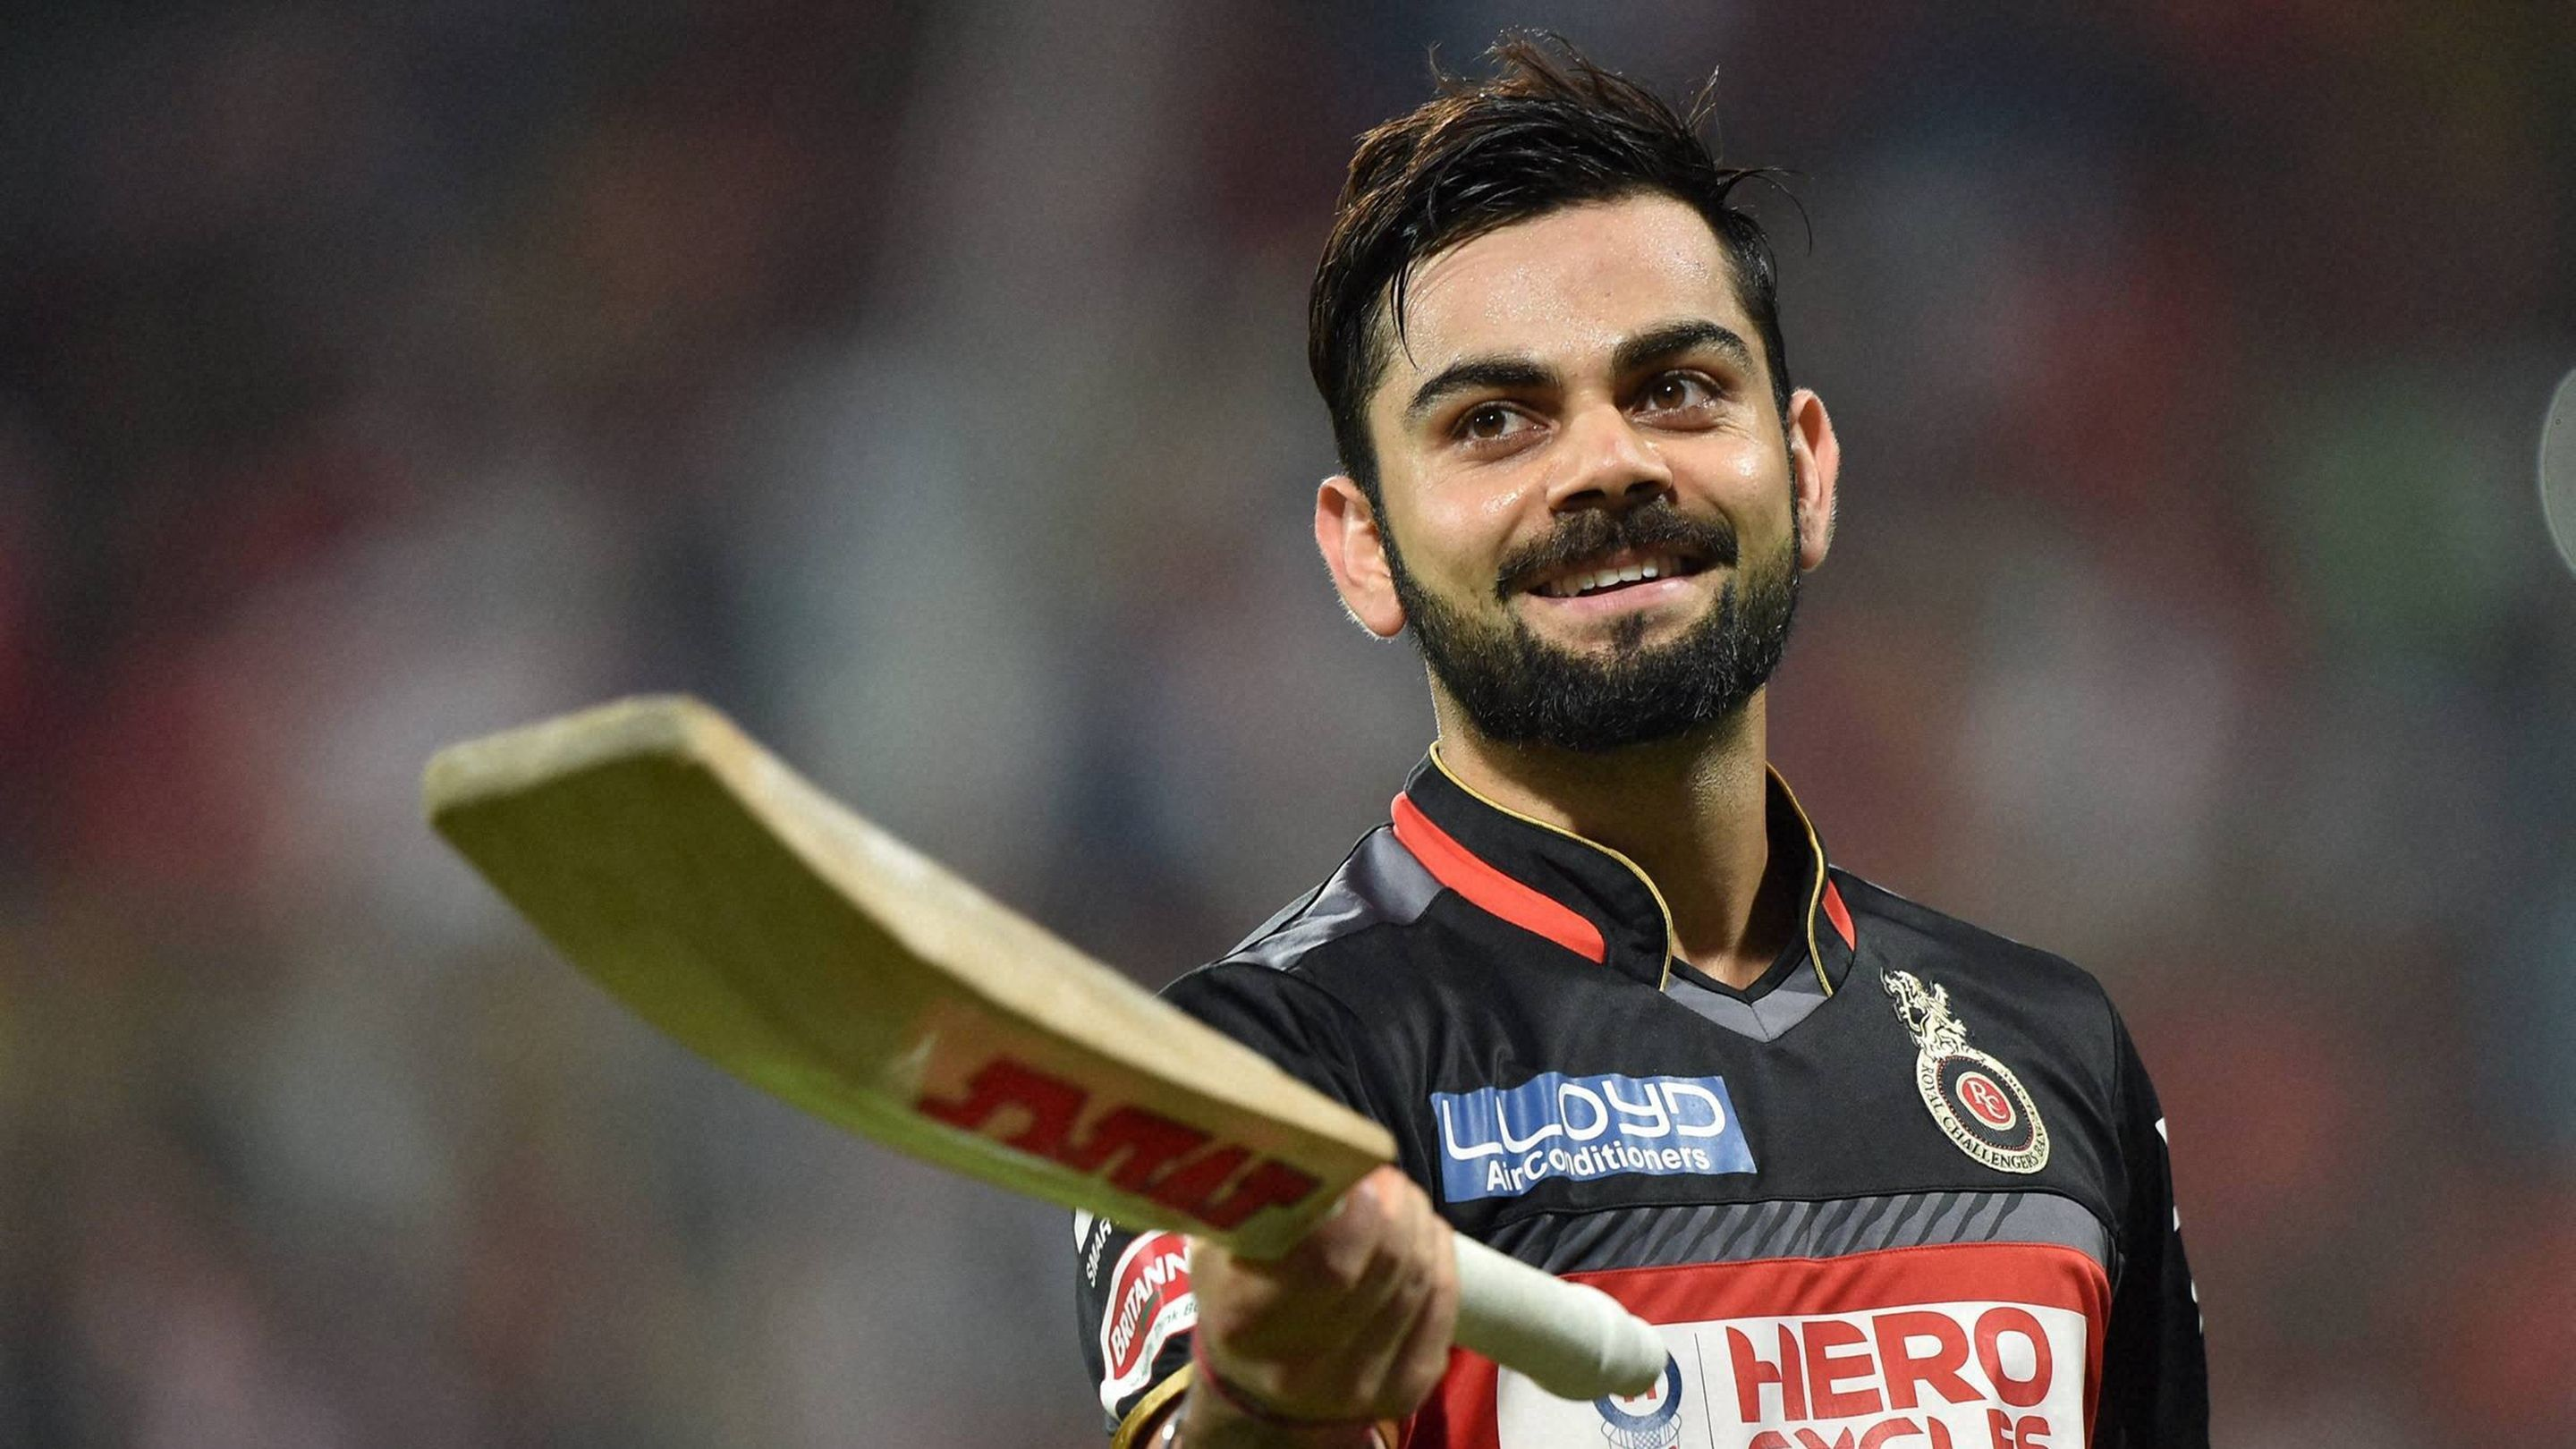

[   {   'age': 27,
        'dominant_emotion': 'angry',
        'dominant_gender': 'Man',
        'dominant_race': 'white',
        'emotion': {   'angry': 57.68879560365729,
                       'disgust': 1.9212014576026216e-06,
                       'fear': 0.010927277042119335,
                       'happy': 39.24968072775832,
                       'neutral': 0.30896732160093526,
                       'sad': 2.729837084730019,
                       'surprise': 0.011789720933573061},
        'face_confidence': 0.91,
        'gender': {'Man': 99.99985694885254, 'Woman': 0.00014596741948480485},
        'race': {   'asian': 1.6037866473197937,
                    'black': 0.8876818232238293,
                    'indian': 8.288893103599548,
                    'latino hispanic': 20.925721526145935,
                    'middle eastern': 23.9096537232399,
                    'white': 44.38426196575165},
        'region': {   'h': 571,
                      'left_eye': (1861, 436),

In [ ]:
from deepface import DeepFace
import pprint
import cv2
#from google.colab.patches import cv2_imshow as imshow # Use cv2_imshow
# Replace cv2_imshow with cv2.imshow:
from google.colab.patches import cv2_imshow

# Update the image path to a location accessible within the Colab environment
img_path = "/content/virat.jpg" #  assuming 'me.jpg' is uploaded or available in Colab content folder

image = cv2.imread(img_path)

# If the image is successfully loaded
if image is not None:
    obj = DeepFace.analyze(img_path = img_path,
                           actions = ['age', 'gender', 'race', 'emotion'])
    # imshow("Face Analysis", image)  # Use cv2_imshow instead, which takes only the image as argument
    cv2_imshow(image) # Call cv2_imshow with the image
    pp = pprint.PrettyPrinter(indent=4)
    pp.pprint(obj)
else:
    print(f"Error: Image not found at {img_path}")